# Post Training Analysis

Here lies the analysis of our findings

In [46]:
import pandas as pd 
import numpy as nb
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [76]:
# bring the log file
file_path = "../../log.csv"

results = pd.read_csv(file_path)
results


,data,variational,convolution,transformer,dropout,latent_dim,padding,kernel_size,hopkins,ari,nmi,silhouette,fm,homogeneity,completeness,v_measure,num_layers,commitment_cost,embedding_dim,num_embeddings
0,../workfiles/light_BRCA_ds.pkl,False,True,False,0.3,64,3,7,0.920001,0.101950,0.139962,0.265472,0.352087,0.155744,0.127085,0.139962,NaN,NaN,NaN,NaN
1,../workfiles/PPMI_genes.pkl,False,True,False,0.3,64,3,7,0.967938,-0.002566,0.003083,0.318965,0.428661,0.004613,0.002316,0.003083,NaN,NaN,NaN,NaN
2,../workfiles/light_BRCA_ds.pkl,False,True,False,0.5,64,1,3,0.788441,0.224102,0.269266,0.082414,0.452619,0.293811,0.248507,0.269266,NaN,NaN,NaN,NaN
3,../workfiles/PPMI_genes.pkl,False,True,False,0.5,64,1,3,0.798850,0.000748,0.007063,0.069840,0.381251,0.011548,0.005087,0.007063,NaN,NaN,NaN,NaN
4,../workfiles/light_BRCA_ds.pkl,False,True,False,0.3,16,2,5,0.657913,0.196644,0.281278,0.077490,0.421511,0.314359,0.254497,0.281278,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,../workfiles/light_BRCA_ds.pkl,NaN,True,False,0.1,16,2,5,0.730126,0.155617,0.248108,0.104178,0.410244,0.267848,0.231078,0.248108,4.0,NaN,NaN,NaN
101,../workfiles/PPMI_genes.pkl,NaN,True,False,0.1,16,2,5,0.776597,-0.013216,0.005614,0.144002,0.437029,0.008369,0.004224,0.005614,4.0,NaN,NaN,NaN
102,../workfiles/PPMI_genes_PD_only.pkl,NaN,True,False,0.1,16,2,5,0.795068,0.024922,0.018060,0.219111,0.526523,0.036901,0.011956,0.018060,4.0,NaN,NaN,NaN
103,../workfiles/light_BRCA_ds.pkl,VQ-VAE,True,False,0.1,128,1,3,0.658982,0.159659,0.238715,0.064201,0.392837,0.267033,0.215828,0.238715,1.0,1.0,16.0,256.0


In [77]:
# let's drop lines where num layer is NaN

results = results[results['num_layers'].notna()]
results

,data,variational,convolution,transformer,dropout,latent_dim,padding,kernel_size,hopkins,ari,nmi,silhouette,fm,homogeneity,completeness,v_measure,num_layers,commitment_cost,embedding_dim,num_embeddings
18,../workfiles/light_BRCA_ds.pkl,NaN,True,False,0.5,16,2,5,0.782300,0.168812,0.245431,0.154505,0.423880,0.263226,0.229890,0.245431,2.0,NaN,NaN,NaN
19,../workfiles/PPMI_genes.pkl,NaN,True,False,0.5,16,2,5,0.818165,-0.002397,0.016632,0.104400,0.377287,0.027273,0.011964,0.016632,2.0,NaN,NaN,NaN
20,../workfiles/light_BRCA_ds.pkl,VAE,True,False,0.5,32,3,7,0.897358,0.074810,0.093994,0.262324,0.345542,0.101391,0.087603,0.093994,5.0,NaN,NaN,NaN
21,../workfiles/PPMI_genes.pkl,VAE,True,False,0.5,32,3,7,0.947097,-0.006648,0.005323,0.336272,0.419194,0.008110,0.003962,0.005323,5.0,NaN,NaN,NaN
22,../workfiles/light_BRCA_ds.pkl,NaN,True,False,0.5,32,1,3,0.838968,0.246258,0.303270,0.157934,0.485458,0.321690,0.286845,0.303270,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,../workfiles/light_BRCA_ds.pkl,NaN,True,False,0.1,16,2,5,0.730126,0.155617,0.248108,0.104178,0.410244,0.267848,0.231078,0.248108,4.0,NaN,NaN,NaN
101,../workfiles/PPMI_genes.pkl,NaN,True,False,0.1,16,2,5,0.776597,-0.013216,0.005614,0.144002,0.437029,0.008369,0.004224,0.005614,4.0,NaN,NaN,NaN
102,../workfiles/PPMI_genes_PD_only.pkl,NaN,True,False,0.1,16,2,5,0.795068,0.024922,0.018060,0.219111,0.526523,0.036901,0.011956,0.018060,4.0,NaN,NaN,NaN
103,../workfiles/light_BRCA_ds.pkl,VQ-VAE,True,False,0.1,128,1,3,0.658982,0.159659,0.238715,0.064201,0.392837,0.267033,0.215828,0.238715,1.0,1.0,16.0,256.0


In [78]:
results.columns

Index(['data', 'variational', 'convolution', 'transformer', 'dropout',
       'latent_dim', 'padding', 'kernel_size', 'hopkins', 'ari', 'nmi',
       'silhouette', 'fm', 'homogeneity', 'completeness', 'v_measure',
       'num_layers', 'commitment_cost', 'embedding_dim', 'num_embeddings'],
      dtype='object')

In [79]:
results['variational'] = results['variational'].fillna("No")


/var/folders/xr/0fvz4r2s4wx1hx13jlhxj2z00000gn/T/ipykernel_42424/4171622134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['variational'] = results['variational'].fillna("No")


In [39]:
BRCA_df = results[results['data']=="../workfiles/light_BRCA_ds.pkl"]
PPMI_df = results[results['data']=="../workfiles/PPMI_genes.pkl"]
PPMI_genes_PD_df = results[results['data']=="../workfiles/PPMI_genes_PD_only.pkl"]

In [101]:
# what is our best performer ? 

#metric = "ari"
#metric = "hopkins"
metric = "silhouette"
values_of_interest = [metric, 'variational', 'dropout', 'latent_dim', 'padding', 'kernel_size','num_layers', 'commitment_cost', 'embedding_dim', 'num_embeddings']


best_BRCA = BRCA_df.sort_values(metric, ascending=False)[:1][values_of_interest]
best_PPMI = PPMI_df.sort_values(metric, ascending=False)[:1][values_of_interest]
best_PPMI_PD = PPMI_genes_PD_df.sort_values(metric, ascending=False)[:1][values_of_interest]

pd.concat([best_BRCA, best_PPMI, best_PPMI_PD])

,silhouette,variational,dropout,latent_dim,padding,kernel_size,num_layers,commitment_cost,embedding_dim,num_embeddings
4,0.936110,VQ-VAE,0.3,128,1,3,1.0,0.2,128.0,128.0
7,0.952191,VQ-VAE,0.1,32,3,7,2.0,0.2,64.0,64.0
36,0.870213,VQ-VAE,0.1,32,3,7,2.0,0.2,64.0,64.0


## All metrics overview based on dataset

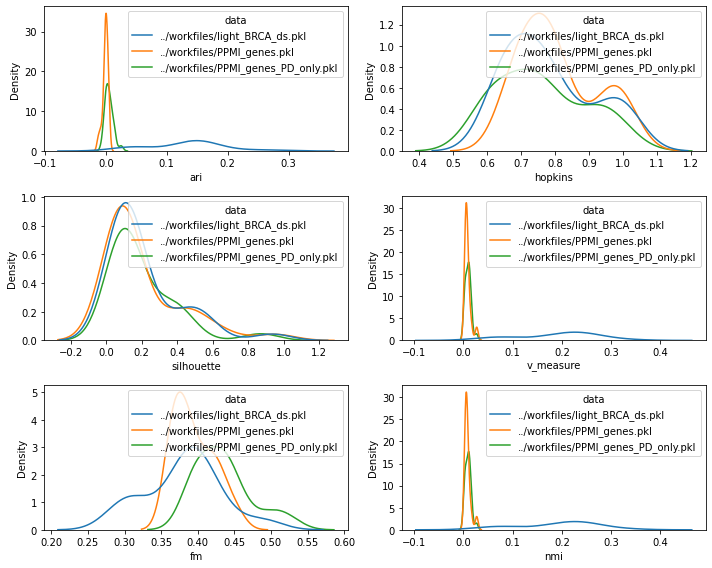

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

sns.kdeplot(results, x="ari", hue = "data", ax=axes[0, 0])
sns.kdeplot(results, x="hopkins", hue = "data", ax=axes[0, 1])
sns.kdeplot(results, x="silhouette", hue = "data", ax=axes[1, 0])
sns.kdeplot(results, x="v_measure", hue = "data", ax=axes[1, 1])
sns.kdeplot(results, x="fm", hue = "data", ax=axes[2, 0])
sns.kdeplot(results, x="nmi", hue = "data", ax=axes[2, 1])

# Adjust spacing between subplots (optional)
plt.tight_layout()

# Show the plots
plt.show()

## Dropout impact

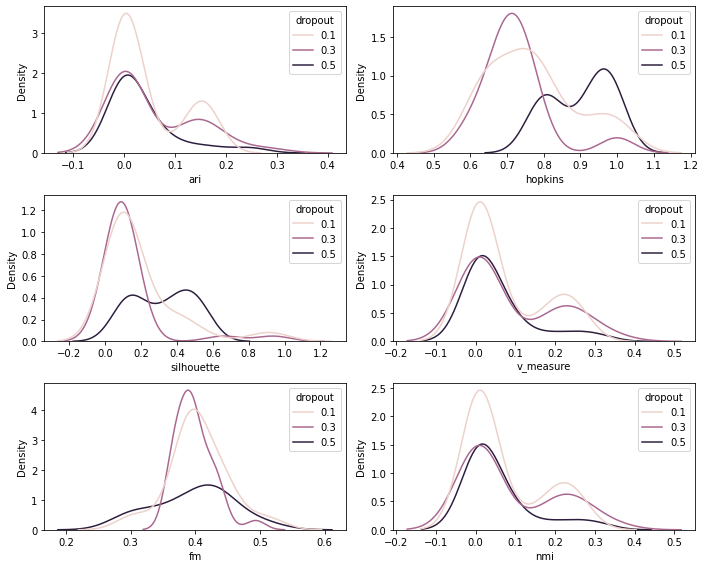

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
hue = "dropout"

sns.kdeplot(results, x="ari", hue = hue, ax=axes[0, 0])
sns.kdeplot(results, x="hopkins", hue = hue, ax=axes[0, 1])
sns.kdeplot(results, x="silhouette", hue = hue, ax=axes[1, 0])
sns.kdeplot(results, x="v_measure", hue = hue, ax=axes[1, 1])
sns.kdeplot(results, x="fm", hue = hue, ax=axes[2, 0])
sns.kdeplot(results, x="nmi", hue = hue, ax=axes[2, 1])

# Adjust spacing between subplots (optional)
plt.tight_layout()

# Show the plots
plt.show()

## latent_dim

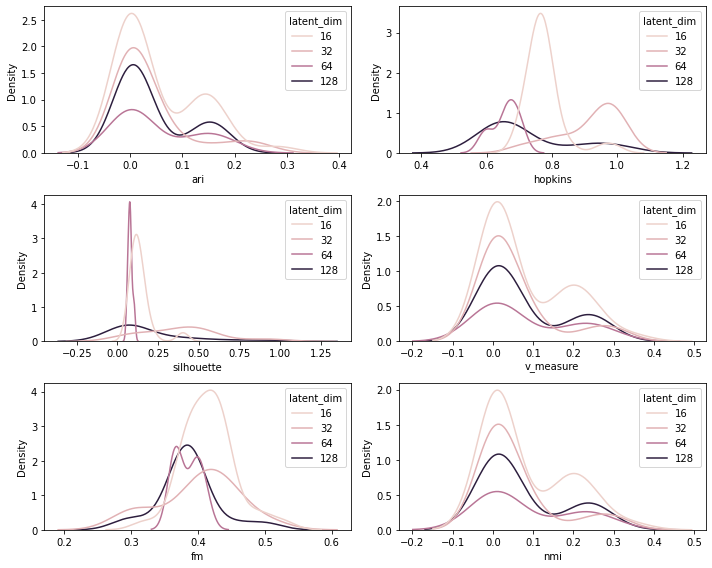

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
hue = "latent_dim"

sns.kdeplot(results, x="ari", hue = hue, ax=axes[0, 0])
sns.kdeplot(results, x="hopkins", hue = hue, ax=axes[0, 1])
sns.kdeplot(results, x="silhouette", hue = hue, ax=axes[1, 0])
sns.kdeplot(results, x="v_measure", hue = hue, ax=axes[1, 1])
sns.kdeplot(results, x="fm", hue = hue, ax=axes[2, 0])
sns.kdeplot(results, x="nmi", hue = hue, ax=axes[2, 1])

# Adjust spacing between subplots (optional)
plt.tight_layout()

# Show the plots
plt.show()

## Variational ? 

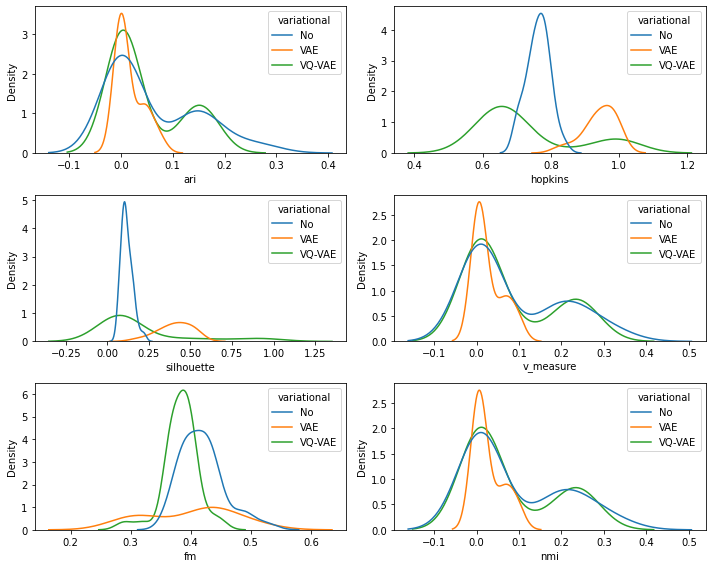

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
hue = "variational"

sns.kdeplot(results, x="ari", hue = hue, ax=axes[0, 0])
sns.kdeplot(results, x="hopkins", hue = hue, ax=axes[0, 1])
sns.kdeplot(results, x="silhouette", hue = hue, ax=axes[1, 0])
sns.kdeplot(results, x="v_measure", hue = hue, ax=axes[1, 1])
sns.kdeplot(results, x="fm", hue = hue, ax=axes[2, 0])
sns.kdeplot(results, x="nmi", hue = hue, ax=axes[2, 1])

# Adjust spacing between subplots (optional)
plt.tight_layout()

# Show the plots
plt.show()

## Kernel size

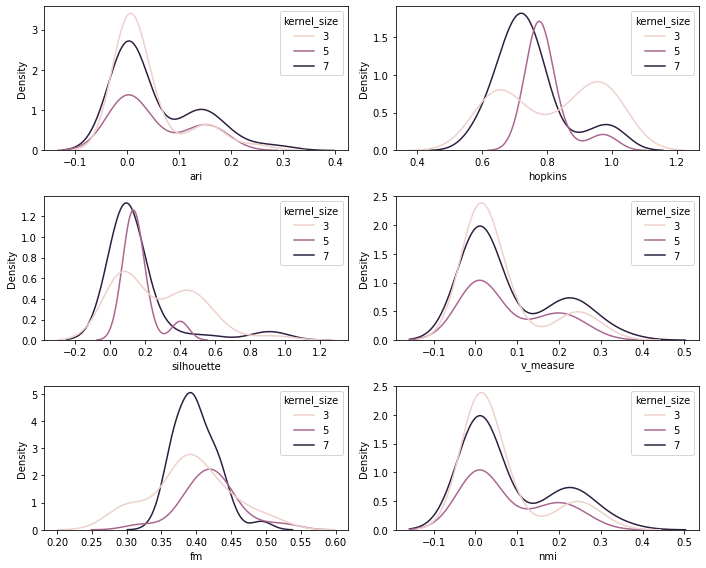

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
hue = "kernel_size"

sns.kdeplot(results, x="ari", hue = hue, ax=axes[0, 0])
sns.kdeplot(results, x="hopkins", hue = hue, ax=axes[0, 1])
sns.kdeplot(results, x="silhouette", hue = hue, ax=axes[1, 0])
sns.kdeplot(results, x="v_measure", hue = hue, ax=axes[1, 1])
sns.kdeplot(results, x="fm", hue = hue, ax=axes[2, 0])
sns.kdeplot(results, x="nmi", hue = hue, ax=axes[2, 1])

# Adjust spacing between subplots (optional)
plt.tight_layout()

# Show the plots
plt.show()

## Numlayers

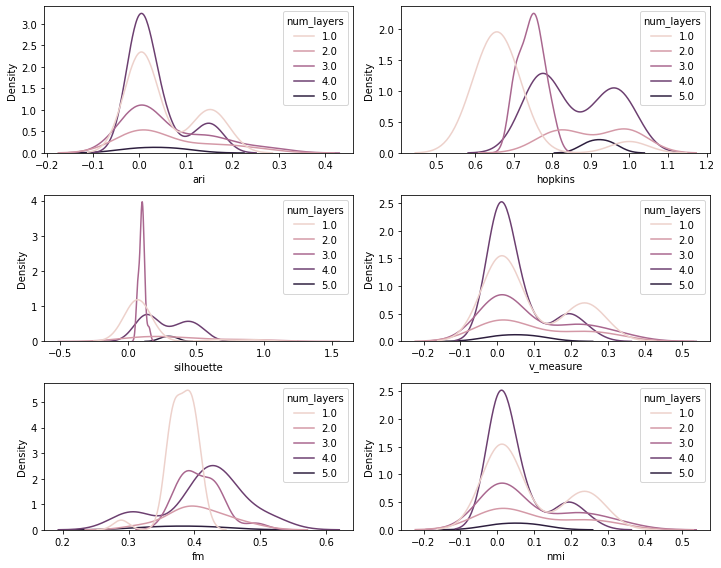

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
hue = "num_layers"

sns.kdeplot(results, x="ari", hue = hue, ax=axes[0, 0])
sns.kdeplot(results, x="hopkins", hue = hue, ax=axes[0, 1])
sns.kdeplot(results, x="silhouette", hue = hue, ax=axes[1, 0])
sns.kdeplot(results, x="v_measure", hue = hue, ax=axes[1, 1])
sns.kdeplot(results, x="fm", hue = hue, ax=axes[2, 0])
sns.kdeplot(results, x="nmi", hue = hue, ax=axes[2, 1])

# Adjust spacing between subplots (optional)
plt.tight_layout()

# Show the plots
plt.show()

### Using chat gpt to do some processing...

In [41]:
# Reset index and merge
#PPMI_genes_PD_df
BRCA_df.reset_index(drop=True, inplace=True)
PPMI_df.reset_index(drop=True, inplace=True)
merged_df = pd.merge(BRCA_df, PPMI_df, left_index=True, right_index=True, suffixes=('_brca', '_ppmi'))
merged_df

,data_brca,variational_brca,convolution_brca,transformer_brca,dropout_brca,latent_dim_brca,padding_brca,kernel_size_brca,hopkins_brca,ari_brca,...,nmi_ppmi,silhouette_ppmi,fm_ppmi,homogeneity_ppmi,completeness_ppmi,v_measure_ppmi,num_layers_ppmi,commitment_cost_ppmi,embedding_dim_ppmi,num_embeddings_ppmi
0,../workfiles/light_BRCA_ds.pkl,No,True,False,0.5,16,2,5,0.782300,0.168812,...,0.016632,0.104400,0.377287,0.027273,0.011964,0.016632,2.0,NaN,NaN,NaN
1,../workfiles/light_BRCA_ds.pkl,VAE,True,False,0.5,32,3,7,0.897358,0.074810,...,0.005323,0.336272,0.419194,0.008110,0.003962,0.005323,5.0,NaN,NaN,NaN
2,../workfiles/light_BRCA_ds.pkl,No,True,False,0.5,32,1,3,0.838968,0.246258,...,0.005216,0.088340,0.383257,0.008528,0.003757,0.005216,2.0,NaN,NaN,NaN
3,../workfiles/light_BRCA_ds.pkl,No,True,False,0.1,16,2,5,0.779493,0.164669,...,0.004713,0.078878,0.407325,0.007431,0.003451,0.004713,4.0,NaN,NaN,NaN
4,../workfiles/light_BRCA_ds.pkl,VQ-VAE,True,False,0.3,128,1,3,0.999614,0.128694,...,0.003939,0.656327,0.385676,0.006415,0.002842,0.003939,1.0,0.2,128.0,128.0
5,../workfiles/light_BRCA_ds.pkl,No,True,False,0.3,32,3,7,0.702720,0.208812,...,0.007113,0.071880,0.389518,0.011528,0.005144,0.007113,3.0,NaN,NaN,NaN
6,../workfiles/light_BRCA_ds.pkl,No,True,False,0.5,16,3,7,0.781063,0.115655,...,0.027365,0.109464,0.364899,0.045820,0.019507,0.027365,3.0,NaN,NaN,NaN
7,../workfiles/light_BRCA_ds.pkl,VQ-VAE,True,False,0.1,32,3,7,1.000000,0.145701,...,0.004534,0.952191,0.400729,0.007225,0.003303,0.004534,2.0,0.2,64.0,64.0
8,../workfiles/light_BRCA_ds.pkl,VAE,True,False,0.1,128,1,3,0.913712,0.039258,...,0.003178,0.422602,0.454351,0.004528,0.002448,0.003178,4.0,NaN,NaN,NaN
9,../workfiles/light_BRCA_ds.pkl,VQ-VAE,True,False,0.1,16,2,5,0.993015,0.056453,...,0.006824,0.164748,0.381962,0.011153,0.004915,0.006824,2.0,1.0,64.0,512.0


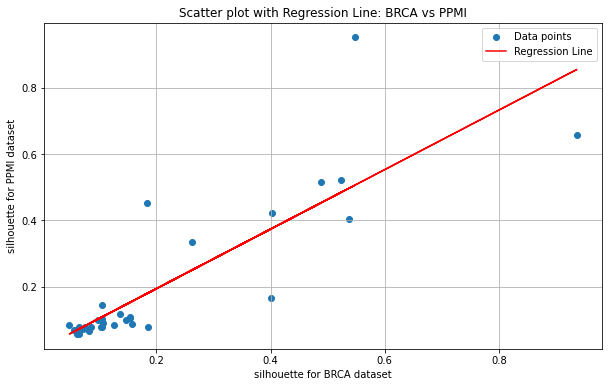

                            OLS Regression Results                            
Dep. Variable:        silhouette_ppmi   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     73.29
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           1.98e-09
Time:                        14:53:59   Log-Likelihood:                 23.116
No. Observations:                  31   AIC:                            -42.23
Df Residuals:                      29   BIC:                            -39.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0144      0.031     

In [54]:
# Fit regression model
X = merged_df['silhouette_brca']
y = merged_df['silhouette_ppmi']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['silhouette_brca'], merged_df['silhouette_ppmi'], label='Data points')

# Plot regression line
predictions = model.predict(X)
plt.plot(merged_df['silhouette_brca'], predictions, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('silhouette for BRCA dataset')
plt.ylabel('silhouette for PPMI dataset')
plt.title('Scatter plot with Regression Line: BRCA vs PPMI')
plt.legend()
plt.grid(True)
plt.show()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


p_value = model.pvalues['silhouette_brca']  # replace 'ari_brca' with the name of your predictor variable
print(f"The p-value for the predictor is: {p_value}")

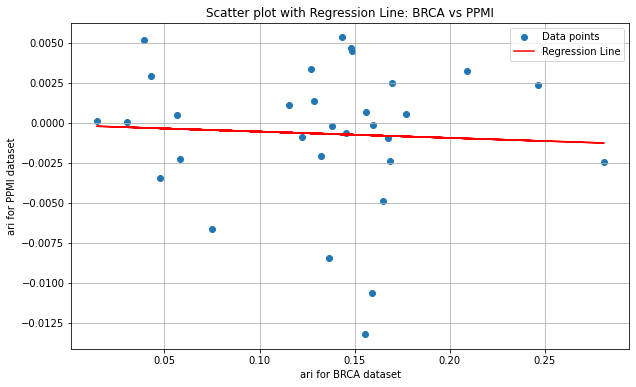

                            OLS Regression Results                            
Dep. Variable:               ari_ppmi   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                   0.08704
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.770
Time:                        14:54:40   Log-Likelihood:                 124.48
No. Observations:                  31   AIC:                            -245.0
Df Residuals:                      29   BIC:                            -242.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.082      0.9

In [55]:
# Fit regression model
X = merged_df['ari_brca']
y = merged_df['ari_ppmi']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['ari_brca'], merged_df['ari_ppmi'], label='Data points')

# Plot regression line
predictions = model.predict(X)
plt.plot(merged_df['ari_brca'], predictions, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('ari for BRCA dataset')
plt.ylabel('ari for PPMI dataset')
plt.title('Scatter plot with Regression Line: BRCA vs PPMI')
plt.legend()
plt.grid(True)
plt.show()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


p_value = model.pvalues['ari_brca']  # replace 'ari_brca' with the name of your predictor variable
print(f"The p-value for the predictor is: {p_value}")

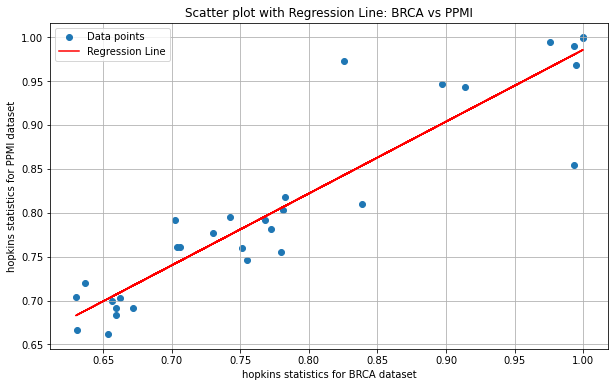

                            OLS Regression Results                            
Dep. Variable:           hopkins_ppmi   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     179.5
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           5.96e-14
Time:                        14:56:25   Log-Likelihood:                 55.013
No. Observations:                  31   AIC:                            -106.0
Df Residuals:                      29   BIC:                            -103.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1677      0.048      3.465   

In [57]:
# Fit regression model
X = merged_df['hopkins_brca']
y = merged_df['hopkins_ppmi']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['hopkins_brca'], merged_df['hopkins_ppmi'], label='Data points')

# Plot regression line
predictions = model.predict(X)
plt.plot(merged_df['hopkins_brca'], predictions, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('hopkins statistics for BRCA dataset')
plt.ylabel('hopkins statistics for PPMI dataset')
plt.title('Scatter plot with Regression Line: BRCA vs PPMI')
plt.legend()
plt.grid(True)
plt.show()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


p_value = model.pvalues['hopkins_brca']  # replace 'ari_brca' with the name of your predictor variable
print(f"The p-value for the predictor is: {p_value}")

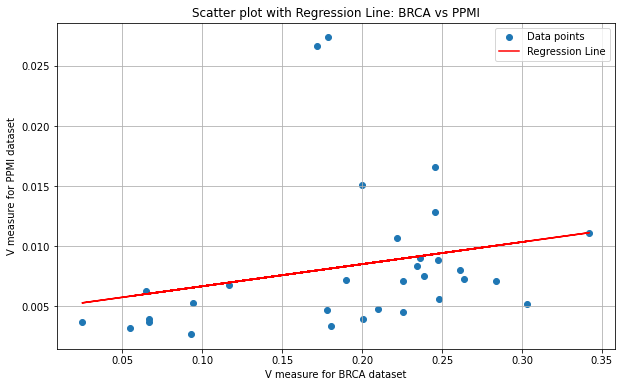

                            OLS Regression Results                            
Dep. Variable:         v_measure_ppmi   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.868
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.182
Time:                        15:04:26   Log-Likelihood:                 115.95
No. Observations:                  31   AIC:                            -227.9
Df Residuals:                      29   BIC:                            -225.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0048      0.003      1.

In [65]:
# Fit regression model
X = merged_df['v_measure_brca']
y = merged_df['v_measure_ppmi']

X_ = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X_).fit()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points')

# Plot regression line
predictions = model.predict(X_)
plt.plot(X, predictions, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('V measure for BRCA dataset')
plt.ylabel('V measure for PPMI dataset')
plt.title('Scatter plot with Regression Line: BRCA vs PPMI')
plt.legend()
plt.grid(True)
plt.show()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


p_value = model.pvalues['v_measure_brca']  # replace 'ari_brca' with the name of your predictor variable
print(f"The p-value for the predictor is: {p_value}")

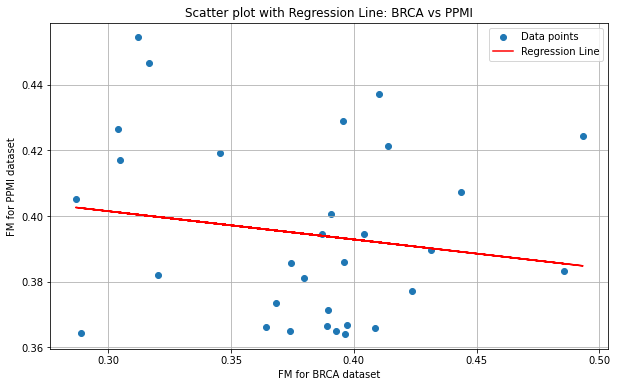

                            OLS Regression Results                            
Dep. Variable:                fm_ppmi   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.8007
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.378
Time:                        15:05:15   Log-Likelihood:                 68.807
No. Observations:                  31   AIC:                            -133.6
Df Residuals:                      29   BIC:                            -130.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4273      0.037     11.576      0.0

In [67]:
# Fit regression model
X = merged_df['fm_brca']
y = merged_df['fm_ppmi']

X_ = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X_).fit()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points')

# Plot regression line
predictions = model.predict(X_)
plt.plot(X, predictions, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('FM for BRCA dataset')
plt.ylabel('FM for PPMI dataset')
plt.title('Scatter plot with Regression Line: BRCA vs PPMI')
plt.legend()
plt.grid(True)
plt.show()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


p_value = model.pvalues['fm_brca']  # replace 'ari_brca' with the name of your predictor variable
print(f"The p-value for the predictor is: {p_value}")

# 3 dimension analysis

In [113]:
# Reset index and merge
BRCA_df.reset_index(drop=True, inplace=True)
PPMI_df.reset_index(drop=True, inplace=True)
PPMI_genes_PD_df.reset_index(drop=True, inplace=True)

# Merge BRCA_df with PPMI_df first
merged_df = pd.merge(BRCA_df, PPMI_df, left_index=True, right_index=True, suffixes=('_brca', '_ppmi'))

# Now merge the resulting merged_df with PPMI_genes_PD_df
merged_df = pd.merge(merged_df, PPMI_genes_PD_df, left_index=True, right_index=True)

# If PPMI_genes_PD_df has a column that is also in BRCA_df or PPMI_df, you'll need to rename it first to avoid a collision
PPMI_genes_PD_df = PPMI_genes_PD_df.rename(columns={'ari': 'ari_ppmi_PD'})

# Merge again
merged_df = pd.merge(merged_df, PPMI_genes_PD_df, left_index=True, right_index=True, suffixes=('', '_ppmi_PD'))

# Now merged_df has the data from all three original DataFrames

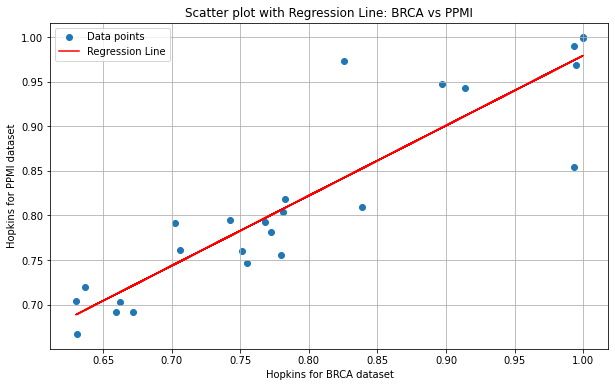

                            OLS Regression Results                            
Dep. Variable:           hopkins_ppmi   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     113.2
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           2.35e-10
Time:                        17:44:23   Log-Likelihood:                 42.653
No. Observations:                  25   AIC:                            -81.31
Df Residuals:                      23   BIC:                            -78.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1936      0.059      3.255   

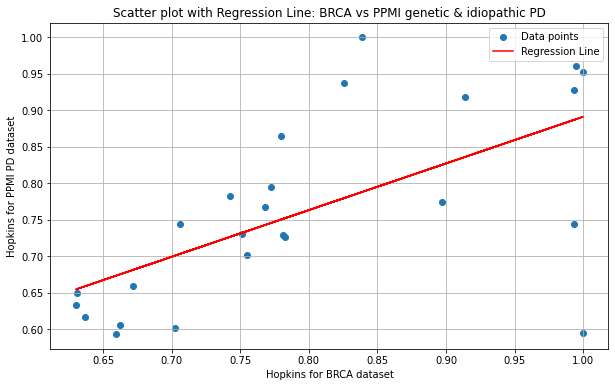

                            OLS Regression Results                            
Dep. Variable:        hopkins_ppmi_PD   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     14.80
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           0.000823
Time:                        17:44:23   Log-Likelihood:                 22.391
No. Observations:                  25   AIC:                            -40.78
Df Residuals:                      23   BIC:                            -38.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2521      0.134      1.885   

In [114]:
# Fit regression model
X = merged_df['hopkins_brca']
y = merged_df['hopkins_ppmi']

X_ = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X_).fit()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points')

# Plot regression line
predictions = model.predict(X_)
plt.plot(X, predictions, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Hopkins for BRCA dataset')
plt.ylabel('Hopkins for PPMI dataset')
plt.title('Scatter plot with Regression Line: BRCA vs PPMI')
plt.legend()
plt.grid(True)
plt.show()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


p_value = model.pvalues['hopkins_brca']  # replace 'ari_brca' with the name of your predictor variable
print(f"The p-value for the predictor is: {p_value}")




# Fit regression model
X = merged_df['hopkins_brca']
y = merged_df['hopkins_ppmi_PD']

X_ = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X_).fit()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points')

# Plot regression line
predictions = model.predict(X_)
plt.plot(X, predictions, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Hopkins for BRCA dataset')
plt.ylabel('Hopkins for PPMI PD dataset')
plt.title('Scatter plot with Regression Line: BRCA vs PPMI genetic & idiopathic PD')
plt.legend()
plt.grid(True)
plt.show()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


p_value = model.pvalues['hopkins_brca']  # replace 'ari_brca' with the name of your predictor variable
print(f"The p-value for the predictor is: {p_value}")

## Silhouette

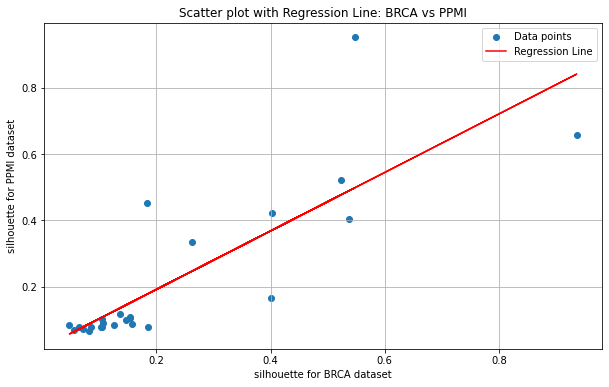

                            OLS Regression Results                            
Dep. Variable:        silhouette_ppmi   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     49.41
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           3.66e-07
Time:                        17:45:37   Log-Likelihood:                 16.144
No. Observations:                  25   AIC:                            -28.29
Df Residuals:                      23   BIC:                            -25.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0151      0.039     

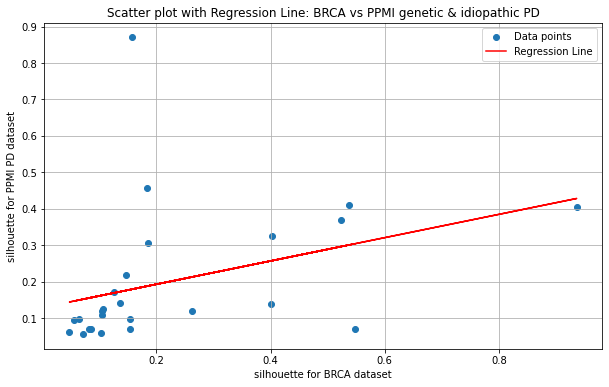

                            OLS Regression Results                            
Dep. Variable:     silhouette_ppmi_PD   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     3.536
Date:                Tue, 14 Nov 2023   Prob (F-statistic):             0.0728
Time:                        17:45:37   Log-Likelihood:                 8.5584
No. Observations:                  25   AIC:                            -13.12
Df Residuals:                      23   BIC:                            -10.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1286      0.053     

In [115]:
# Fit regression model
X = merged_df['silhouette_brca']
y = merged_df['silhouette_ppmi']

X_ = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X_).fit()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points')

# Plot regression line
predictions = model.predict(X_)
plt.plot(X, predictions, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('silhouette for BRCA dataset')
plt.ylabel('silhouette for PPMI dataset')
plt.title('Scatter plot with Regression Line: BRCA vs PPMI')
plt.legend()
plt.grid(True)
plt.show()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


p_value = model.pvalues['silhouette_brca']  # replace 'ari_brca' with the name of your predictor variable
print(f"The p-value for the predictor is: {p_value}")




# Fit regression model
X = merged_df['silhouette_brca']
y = merged_df['silhouette_ppmi_PD']

X_ = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X_).fit()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points')

# Plot regression line
predictions = model.predict(X_)
plt.plot(X, predictions, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('silhouette for BRCA dataset')
plt.ylabel('silhouette for PPMI PD dataset')
plt.title('Scatter plot with Regression Line: BRCA vs PPMI genetic & idiopathic PD')
plt.legend()
plt.grid(True)
plt.show()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


p_value = model.pvalues['silhouette_brca']  # replace 'ari_brca' with the name of your predictor variable
print(f"The p-value for the predictor is: {p_value}")

## ARI

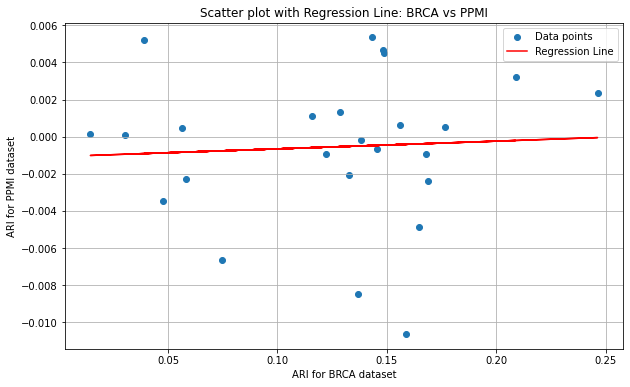

                            OLS Regression Results                            
Dep. Variable:               ari_ppmi   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                   0.08163
Date:                Tue, 14 Nov 2023   Prob (F-statistic):              0.778
Time:                        17:46:32   Log-Likelihood:                 102.86
No. Observations:                  25   AIC:                            -201.7
Df Residuals:                      23   BIC:                            -199.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.002     -0.538      0.5

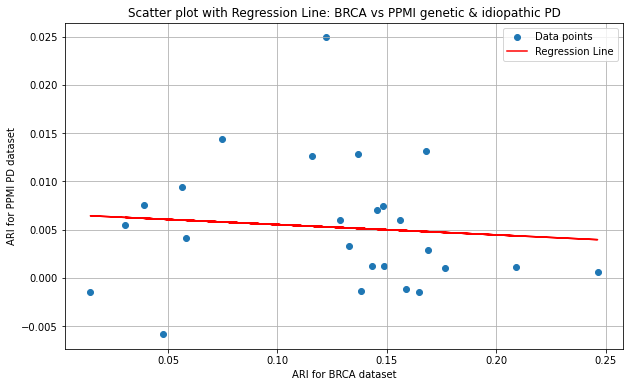

                            OLS Regression Results                            
Dep. Variable:            ari_ppmi_PD   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.1978
Date:                Tue, 14 Nov 2023   Prob (F-statistic):              0.661
Time:                        17:46:32   Log-Likelihood:                 90.311
No. Observations:                  25   AIC:                            -176.6
Df Residuals:                      23   BIC:                            -174.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0066      0.003      1.995      0.0

In [116]:
# Fit regression model
X = merged_df['ari_brca']
y = merged_df['ari_ppmi']

X_ = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X_).fit()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points')

# Plot regression line
predictions = model.predict(X_)
plt.plot(X, predictions, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('ARI for BRCA dataset')
plt.ylabel('ARI for PPMI dataset')
plt.title('Scatter plot with Regression Line: BRCA vs PPMI')
plt.legend()
plt.grid(True)
plt.show()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


p_value = model.pvalues['ari_brca']  # replace 'ari_brca' with the name of your predictor variable
print(f"The p-value for the predictor is: {p_value}")




# Fit regression model
X = merged_df['ari_brca']
y = merged_df['ari_ppmi_PD']

X_ = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X_).fit()

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points')

# Plot regression line
predictions = model.predict(X_)
plt.plot(X, predictions, color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('ARI for BRCA dataset')
plt.ylabel('ARI for PPMI PD dataset')
plt.title('Scatter plot with Regression Line: BRCA vs PPMI genetic & idiopathic PD')
plt.legend()
plt.grid(True)
plt.show()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


p_value = model.pvalues['ari_brca']  # replace 'ari_brca' with the name of your predictor variable
print(f"The p-value for the predictor is: {p_value}")